<a href="https://colab.research.google.com/github/Carlos-Alberto-Antonio-G-Fuentes/challenge_one_datascience_telecomx/blob/main/challenge_telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cargar los datos directamente desde la API utilizando Python.

##Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [264]:
import pandas as pd
datos=pd.read_json('/content/TelecomX_Data.json')
datos.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [265]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##Verificando las columnas si contienen listas

In [266]:
columnas=list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

##Normalizando las columnas que tienen listas

In [267]:
# Expandir las columnas que contienen diccionarios
customer_df = datos['customer'].apply(pd.Series)
phone_df    = datos['phone'].apply(pd.Series)
internet_df = datos['internet'].apply(pd.Series)
account_df  = datos['account'].apply(pd.Series)

# Combinar todo en un solo DataFrame
datos_normalizados = pd.concat([datos.drop(columns=['customer', 'phone', 'internet', 'account']),
                            customer_df, phone_df, internet_df, account_df], axis=1)



In [268]:
datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [269]:
charges_df = datos_normalizados['Charges'].apply(pd.Series)

# Renombrar las columnas si es necesario
charges_df.columns = ['MonthlyCharges', 'TotalCharges']

# Unir con el DataFrame original y eliminar la columna original 'Charges'
datos_final = pd.concat([datos_normalizados.drop(columns='Charges'), charges_df], axis=1)

In [270]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Revisando que datos no se podrian con vertir a float64

In [271]:
datos_final[pd.to_numeric(datos_final['TotalCharges'], errors='coerce').isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [272]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Reemplazando los datos vacios por Nan

In [273]:
datos_final['TotalCharges'] = datos_final['TotalCharges'].replace(' ', pd.NA)

Reemplazando los Nan por 0.0

In [274]:
datos_final['TotalCharges'] = datos_final['TotalCharges'].fillna(0.0)

Verificando si quedaron Nan en la columna TotalCharges

In [275]:
print(datos_final['TotalCharges'].isna().sum())

0


Convirtiendo la columna TotalCharges a float64

In [276]:
import numpy as np

In [277]:
datos_final['TotalCharges'] = datos_final['TotalCharges'].astype(float)

In [278]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# Diccionario de datos

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de

OnlineSecurity: suscripción adicional de seguridad en

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

#Calculando las cuentas diarias y almacenando la información en una columna creada llamada Cuentas_Diarias

In [279]:
datos_final['Cuentas_Diarias'] = datos_final['MonthlyCharges'] / 30

In [280]:
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

Verificando que columnas contienen valores Yes y NO

In [281]:
columnas_con_yes_no = []

for col in datos_final.columns:
    if datos_final[col].dtype == 'object':  # solo columnas de texto
        valores_unicos = datos_final[col].unique()
        if 'Yes' in valores_unicos or 'No' in valores_unicos:
            columnas_con_yes_no.append(col)

print("Columnas que contienen 'Yes' o 'No':")
print(columnas_con_yes_no)

Columnas que contienen 'Yes' o 'No':
['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


Verificando que datos tienen las columnas que contienen Yes y NO

In [282]:
columnas = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in columnas:
    print(f"{col}: {datos_final[col].unique()}")

Churn: ['No' 'Yes' '']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']


In [283]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Convertir columnas de Yes y NO a 1 y 0 respectivamente

In [284]:
columnas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in columnas_binarias:
    datos_final[col] = datos_final[col].replace({'Yes': 1, 'No': 0})

<ipython-input-284-2a23007b1b7b>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_final[col] = datos_final[col].replace({'Yes': 1, 'No': 0})


#Verificando valores distintos a 0 y 1

In [285]:
columnas = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in columnas:
    print(f"{col}: {datos_final[col].unique()}")

Churn: [0 1 '']
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
MultipleLines: [0 1 'No phone service']
OnlineSecurity: [0 1 'No internet service']
OnlineBackup: [1 0 'No internet service']
DeviceProtection: [0 1 'No internet service']
TechSupport: [1 0 'No internet service']
StreamingTV: [1 0 'No internet service']
StreamingMovies: [0 1 'No internet service']
PaperlessBilling: [1 0]


In [286]:
datos_final['Churn']=datos_final['Churn'].replace('',0)

<ipython-input-286-950399c1b514>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_final['Churn']=datos_final['Churn'].replace('',0)


In [287]:
datos_final['MultipleLines']=datos_final['MultipleLines'].replace('No phone service',0)

<ipython-input-287-92c28e6177d4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_final['MultipleLines']=datos_final['MultipleLines'].replace('No phone service',0)


In [288]:
columnas_distintas = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

for col in columnas_distintas:
    datos_final[col] = datos_final[col].replace('No internet service', 0)

<ipython-input-288-ec3d8c3473b5>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_final[col] = datos_final[col].replace('No internet service', 0)


In [289]:
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [290]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [291]:
print(datos_final['PaymentMethod'].unique())

['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [292]:
columnas_a_minúsculas = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
datos_final[columnas_a_minúsculas] = datos_final[columnas_a_minúsculas].apply(lambda x: x.str.lower())


In [293]:
datos_final['PaymentMethod'] = datos_final['PaymentMethod'].replace('credit card (automatic)', 'credit card automatic')

In [294]:
datos_final['PaymentMethod'] = datos_final['PaymentMethod'].replace('bank transfer (automatic)', 'bank transfer automatic')

In [295]:
print(datos_final['Contract'].unique())

['one year' 'month-to-month' 'two year']


In [296]:
datos_final['Contract'] = datos_final['Contract'].replace('month-to-month', 'month to month')

In [297]:
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month to month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month to month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month to month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month to month,1,mailed check,83.9,267.40,2.796667


#Calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [298]:
datos_final.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [299]:
resumen = pd.DataFrame({
    'Contador': datos_final.count(numeric_only=True),
    'Media': datos_final.mean(numeric_only=True),
    'Mediana': datos_final.median(numeric_only=True),
    'Desviación estándar': datos_final.std(numeric_only=True),
    'Mínimo': datos_final.min(numeric_only=True),
    'Máximo': datos_final.max(numeric_only=True),
    'Percentil 25%': datos_final.quantile(0.25, numeric_only=True),
    'Percentil 50%': datos_final.quantile(0.50, numeric_only=True),
    'Percentil 75%': datos_final.quantile(0.75, numeric_only=True)
})

print(resumen)

                  Contador        Media      Mediana  Desviación estándar  \
Churn                 7267     0.257190     0.000000             0.437115   
SeniorCitizen         7267     0.162653     0.000000             0.369074   
Partner               7267     0.484106     0.000000             0.499782   
Dependents            7267     0.300124     0.000000             0.458343   
tenure                7267    32.346498    29.000000            24.571773   
PhoneService          7267     0.902711     1.000000             0.296371   
MultipleLines         7267     0.421770     0.000000             0.493876   
OnlineSecurity        7267     0.285950     0.000000             0.451897   
OnlineBackup          7267     0.344571     0.000000             0.475261   
DeviceProtection      7267     0.342782     0.000000             0.474672   
TechSupport           7267     0.289528     0.000000             0.453575   
StreamingTV           7267     0.383927     0.000000             0.486374   

#En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

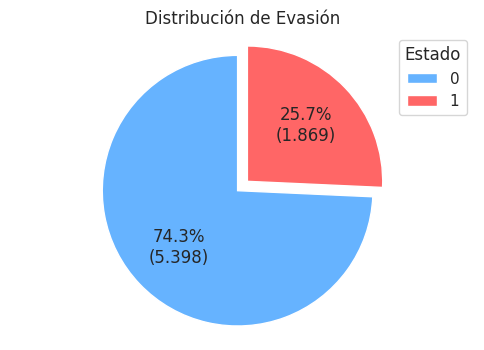

In [355]:
import matplotlib.pyplot as plt

churn_counts = datos_final['Churn'].value_counts()
labels = churn_counts.index
colores = ['#66b3ff', '#ff6666']
explode = (0, 0.1)

# Mostrar % y cantidad con separador de miles
def formato(pct):
    total = sum(churn_counts)
    cantidad = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({format(cantidad, ",").replace(",", ".")})'

plt.figure(figsize=(6, 4))
plt.pie(churn_counts,
        colors=colores,
        explode=explode,
        autopct=formato,
        startangle=90)
plt.title('Distribución de Evasión')
plt.axis('equal')
plt.legend(labels, title='Estado')
plt.savefig('clientes_inactivos.png', dpi=300, bbox_inches='tight')
plt.show()

In [301]:
datos_final['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


#Analizando la Evasión por Genero, tipo de contrato y metodo de pago

Creación df evasion

In [302]:
evasion=pd.concat([
    datos_final['gender'],
    datos_final['Churn'].astype('int64'),
    datos_final['Contract'],
    datos_final['PaymentMethod'].astype('category')
    ],
    axis=1)


In [303]:
evasion=evasion[evasion['Churn']==0]

In [304]:
evasion.reset_index(inplace=True,drop=True)

In [305]:
evasion.head()

,gender,Churn,Contract,PaymentMethod
0,female,0,one year,mailed check
1,male,0,month to month,mailed check
2,female,0,month to month,credit card automatic
3,female,0,two year,bank transfer automatic
4,male,0,two year,credit card automatic


#Grafica Evasion por Genero, tipo de contrato y metodo de pago (Cantidad de clientes)

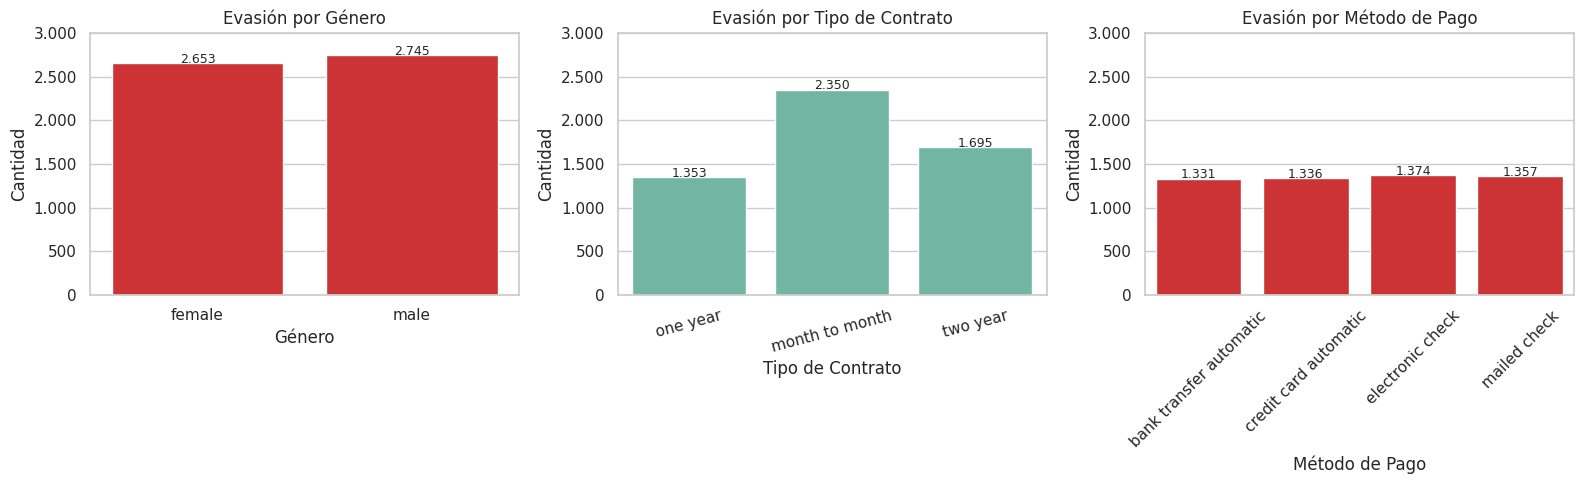

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Función para formatear los números con punto como separador de miles
def miles_con_punto(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

# Función para añadir etiquetas con separador de miles
def agregar_etiquetas(ax):
    for container in ax.containers:
        for bar in container:
            altura = bar.get_height()
            if altura > 0:
                ax.text(bar.get_x() + bar.get_width() / 2,
                        altura + 3,
                        f'{int(altura):,}'.replace(',', '.'),
                        ha='center', fontsize=9)

# Crear figura
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.set(style="whitegrid")

# Ajustar límites y formateo del eje Y
for ax in axes:
    ax.set_ylim(0, 3000)
    ax.yaxis.set_major_locator(MultipleLocator(500))
    ax.yaxis.set_major_formatter(FuncFormatter(miles_con_punto))

# Subgráfico 1: Evasión por género
sns.countplot(data=evasion, x='gender', hue='Churn', ax=axes[0], palette='Set1')
axes[0].set_title('Evasión por Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Cantidad')
agregar_etiquetas(axes[0])

# Subgráfico 2: Evasión por tipo de contrato
sns.countplot(data=evasion, x='Contract', hue='Churn', ax=axes[1], palette='Set2')
axes[1].set_title('Evasión por Tipo de Contrato')
axes[1].set_xlabel('Tipo de Contrato')
axes[1].set_ylabel('Cantidad')
axes[1].tick_params(axis='x', rotation=15)
agregar_etiquetas(axes[1])

# Subgráfico 3: Evasión por método de pago
sns.countplot(data=evasion, x='PaymentMethod', hue='Churn', ax=axes[2], palette='Set1')
axes[2].set_title('Evasión por Método de Pago')
axes[2].set_xlabel('Método de Pago')
axes[2].set_ylabel('Cantidad')
axes[2].tick_params(axis='x', rotation=45)
agregar_etiquetas(axes[2])

# Opcional: remover leyendas si no las quieres
axes[0].legend_.remove()
axes[1].legend_.remove()
axes[2].legend_.remove()

# Ajuste final y guardado
plt.tight_layout()
plt.savefig('clientes_inactivos_genero_contrato_metpago.png', dpi=300, bbox_inches='tight')
plt.show()


In [307]:
# Contar ocurrencias
conteo_genero = evasion['gender'].value_counts()
conteo_tipo_contrato = evasion['Contract'].value_counts()
conteo_metodo_pago = evasion['PaymentMethod'].value_counts()

# Imprimir cada conteo por separado, ordenado y legible
print("🔹 Conteo por Género:\n",conteo_genero, "\n")
print("🔹 Conteo por Tipo de Contrato:\n",conteo_tipo_contrato, "\n")
print("🔹 Conteo por Método de Pago:\n",conteo_metodo_pago)

🔹 Conteo por Género:
 gender
male      2745
female    2653
Name: count, dtype: int64 

🔹 Conteo por Tipo de Contrato:
 Contract
month to month    2350
two year          1695
one year          1353
Name: count, dtype: int64 

🔹 Conteo por Método de Pago:
 PaymentMethod
electronic check           1374
mailed check               1357
credit card automatic      1336
bank transfer automatic    1331
Name: count, dtype: int64


#Grafica Evasion por Genero, tipo de contrato y metodo de pago (% de clientes)

In [339]:
# Contar cuántos clientes inactivos hay por género
datos_genero = evasion['gender'].value_counts().reset_index()
datos_genero.columns = ['gender', 'Cantidad']

# Contar cuántos clientes inactivos hay por contrato
datos_contrato = evasion['Contract'].value_counts().reset_index()
datos_contrato.columns = ['Contract', 'Cantidad']

# Contar cuántos clientes inactivos hay por Metodo de pago
datos_metodo_pago = evasion['PaymentMethod'].value_counts().reset_index()
datos_metodo_pago.columns = ['PaymentMethod', 'Cantidad']

# Calcular el total de clientes
total = datos_genero['Cantidad'].sum()

# Calcular el porcentaje por genero
datos_genero['Porcentaje'] = ((datos_genero['Cantidad'] / total) * 100).round(2).astype(str) + ' %'

# Calcular el porcentaje por contrato
datos_contrato['Porcentaje'] = ((datos_contrato['Cantidad'] / total) * 100).round(2).astype(str) + ' %'

# Calcular el porcentaje por metodo de pago
datos_metodo_pago['Porcentaje'] = ((datos_metodo_pago['Cantidad'] / total) * 100).round(2).astype(str) + ' %'

# Imprimir cada conteo por separado
print("🔹 % por Género:\n",datos_genero, "\n")
print("🔹 % por Tipo de Contrato:\n",datos_contrato, "\n")
print("🔹 % por Método de Pago:\n",datos_metodo_pago)

🔹 % por Género:
    gender  Cantidad Porcentaje
0    male      2745    50.85 %
1  female      2653    49.15 % 

🔹 % por Tipo de Contrato:
          Contract  Cantidad Porcentaje
0  month to month      2350    43.53 %
1        two year      1695     31.4 %
2        one year      1353    25.06 % 

🔹 % por Método de Pago:
              PaymentMethod  Cantidad Porcentaje
0         electronic check      1374    25.45 %
1             mailed check      1357    25.14 %
2    credit card automatic      1336    24.75 %
3  bank transfer automatic      1331    24.66 %


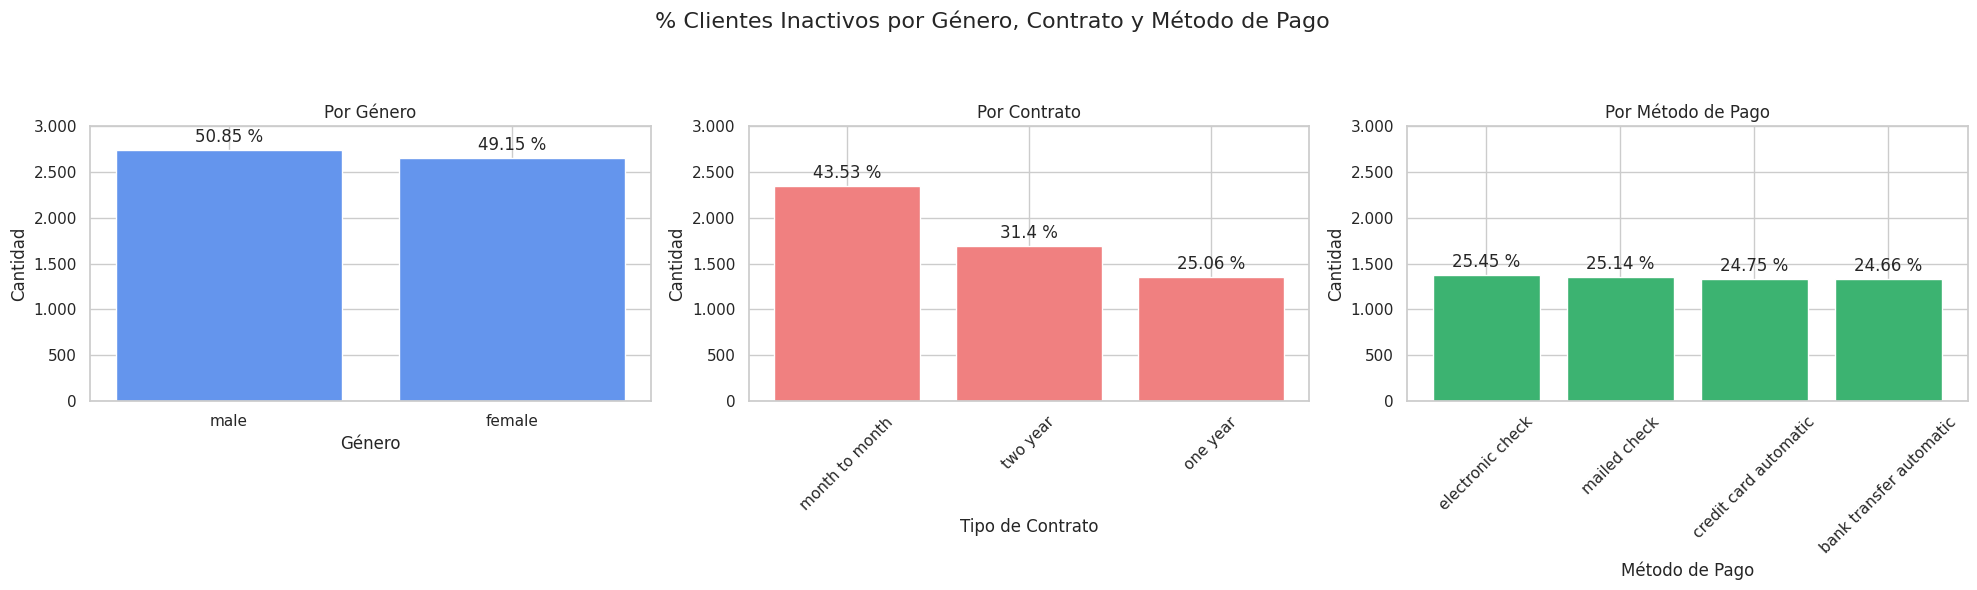

In [363]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Función para formatear los números con punto como separador de miles
def miles_con_punto(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

# Crear la figura y los subplots (1 fila, 3 columnas)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('% Clientes Inactivos por Género, Contrato y Método de Pago', fontsize=16)

# Ajustar límites y números con separadores de miles
for ax in axs:
    ax.set_ylim(0, 3000)
    ax.yaxis.set_major_locator(MultipleLocator(500))
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(miles_con_punto))

# Subplot 1: Género
axs[0].bar(datos_genero['gender'], datos_genero['Cantidad'], color='cornflowerblue')
axs[0].set_title('Por Género')
axs[0].set_xlabel('Género')
axs[0].set_ylabel('Cantidad')
#axs[0].yaxis.set_major_formatter(mtick.FuncFormatter(miles_con_punto))
axs[0].bar_label(axs[0].containers[0], labels=datos_genero['Porcentaje'], padding=3)

# Subplot 2: Contrato
axs[1].bar(datos_contrato['Contract'], datos_contrato['Cantidad'], color='lightcoral')
axs[1].set_title('Por Contrato')
axs[1].set_xlabel('Tipo de Contrato')
axs[1].set_ylabel('Cantidad')
axs[1].tick_params(axis='x', rotation=45)
#axs[1].yaxis.set_major_formatter(mtick.FuncFormatter(miles_con_punto))
axs[1].bar_label(axs[1].containers[0], labels=datos_contrato['Porcentaje'], padding=3)

# Subplot 3: Método de Pago
axs[2].bar(datos_metodo_pago['PaymentMethod'], datos_metodo_pago['Cantidad'], color='mediumseagreen')
axs[2].set_title('Por Método de Pago')
axs[2].set_xlabel('Método de Pago')
axs[2].set_ylabel('Cantidad')
axs[2].tick_params(axis='x', rotation=45)
#axs[2].yaxis.set_major_formatter(mtick.FuncFormatter(miles_con_punto))
axs[2].bar_label(axs[2].containers[0], labels=datos_metodo_pago['Porcentaje'], padding=3)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig('porcentaje_clientes_inactivos_genero_contrato_metpago.png', dpi=300, bbox_inches='tight')
plt.show()

#En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [308]:
datos_final['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


In [309]:
evasion_2=pd.concat([
    datos_final['Churn'].astype('int64'),
    datos_final['TotalCharges'],
    datos_final['tenure']],
    axis=1)

In [310]:
evasion_2

,Churn,TotalCharges,tenure
0,0,593.30,9
1,0,542.40,9
2,1,280.85,4
3,1,1237.85,13
4,1,267.40,3
...,...,...,...
7262,0,742.90,13
7263,1,1873.70,22
7264,0,92.75,2
7265,0,4627.65,67


##Grafico histograma para visualizar cómo se distribuyen las variables numéricas entre quienes cancelaron y quienes no, respecto TotalCharges y tenure

In [311]:
evasion_2['TotalCharges'].max()

8684.8

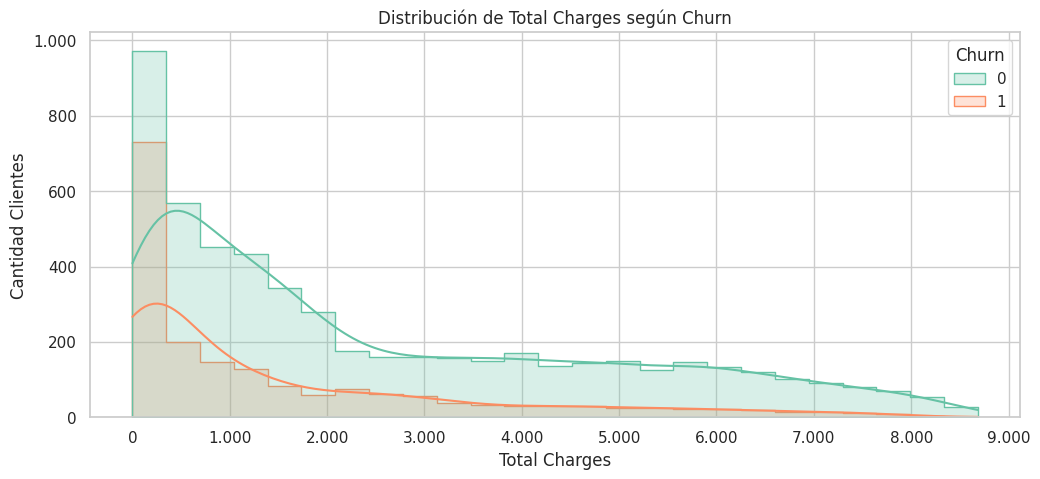

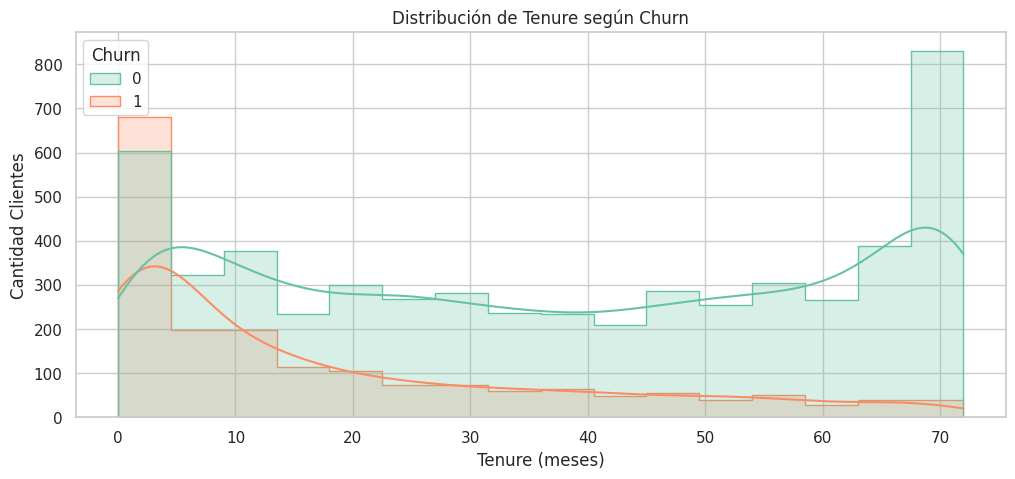

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Formato con separador de miles como punto
def miles_con_punto(x, _):
    return f'{int(x):,}'.replace(',', '.')

# Histograma de TotalCharges por Evasión
plt.figure(figsize=(12, 5))

# Histograma TotalCharges
sns.histplot(data=evasion_2, x='TotalCharges', hue='Churn', kde=True, palette='Set2', element='step')
plt.title('Distribución de Total Charges según Churn')
plt.xlabel('Total Charges')
plt.ylabel('Cantidad Clientes')

# Eje X: pasos de 1.000
plt.gca().xaxis.set_major_locator(MultipleLocator(1000))
plt.gca().xaxis.set_major_formatter(FuncFormatter(miles_con_punto))
plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_con_punto))

plt.savefig('distribucion_clientes_inactivos_totalcharges.png', dpi=300, bbox_inches='tight')

plt.show()

# Histograma tenencia
plt.figure(figsize=(12, 5))
sns.histplot(data=evasion_2, x='tenure', hue='Churn', kde=True, palette='Set2', element='step')
plt.title('Distribución de Tenure según Churn')
plt.xlabel('Tenure (meses)')
plt.ylabel('Cantidad Clientes')

plt.savefig('distribucion_clientes_inactivos_tenure.png', dpi=300, bbox_inches='tight')

plt.show()

# Informe final

###Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

###Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

1.   Se creo un DataFrame a partir del archivo JSON proporcionado denominado TelecomX_Data.
2.   Se reviso el contenido del DataFrame creado con el código datos.info().
3.   Se verificaron las columnas si contienen listas, con el código columnas=list(datos.columns).
4.   Se normalizaron las columnas que tenían listas (customer, phone, internet, account) y se expanden las columnas que contienen diccionarios y se crea un df llamado datos_normalizados.
5.   Se detecta otra columna con listas denominada Charges, la cual se normaliza y se procede a eliminar. De esta normalización se generan 2 nuevas columnas, denominadas MonthlyCharges y TotalCharges (esta información estaba contenida inicialmente como una lista en la columna Charges). Estas 2 columnas nuevas se unen a nuestro DataFrame datos_normalizados.
6.   Se crea un nuevo df denominado datos_final a partir de datos_normalizados.
7.   Se vuelve a revisar el contenido del DataFrame creado con el código datos_normalizados.info().
8.   Se procede a revisar si contienen datos vacios o Nan las columnas MonthlyCharges y TotalCharges, detectándose esta ocurrencia en la columna TotalCharges.
9.   Se reemplazan los datos vacíos por Nan.
10.  Se reemplazan los Nan por 0.0.
11.  Se verifica si quedaron Nan en la columna TotalCharges.
12.  Se convierte la columna TotalCharges a float64.
13.  Se vuelve a revisar el contenido del DataFrame creado con el código datos_final.info().
14.  Se revisa el diccionario.
15.  Se calculan las cuentas diarias y almacenando la información en una columna creada llamada Cuentas_Diarias.
16.  Se vuelve a revisar el contenido del DataFrame creado con el código datos_final.info().
17.  Se verifican las columnas que contienen valores Yes y NO.
18.  Estas columnas tenian valores distintos a YES o NO
Churn: ['No' 'Yes' '']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']

Por lo anterior los valores distintos a YES o NO se reemplazaron por 0.
Además se detectó que la columna InternetService: ['DSL' 'Fiber optic' 'No'] si bien tiene valores NO, esta columna no será intervenida.
19.  Se cambian a minúscula las siguientes columnas:
gender
InternetService
Contract
PaymentMethod
20.  En la columna PaymentMethod, se reemplazan los siguientes valores:
credit card (automatic) por credit card automatic
bank transfer (automatic) por bank transfer automatic.
21.  En la columna Contract, se reemplazan los siguientes valores:
month-to-month por month to month
22.  Se revisa el archivo datos_final.
23.  Se calculan metricas con el codigo datos_final.describe().
24.  Se utiliza gráfico de torta (pie) para visualizar la proporción de clientes que permanecieron y los que se dieron de baja marcados en la columna Churn (1=activo;0=inactivo).
25.  Se crea un nuevo df denominado evasion, para analizar y graficar la evasión por genero, tipo de contrato y metodo de pago.
26.  Grafica evasion por genero, tipo de contrato y metodo de pago (cantidad de clientes).
28.  Grafica evasion por genero, tipo de contrato y metodo de pago (% de clientes).
29.  Se crea un nuevo df denominado evasion2, para analizar y graficar la evasión por TotalCharges y tenure.
30.  Grafico histograma para visualizar cómo se distribuyen las variables numéricas entre quienes cancelaron y quienes no, respecto TotalCharges y tenure.

##Análisis Exploratorio de Datos



*   El analisis  de clientes de la empresa TelecomX muestra lo siguiente:

Se puede apreciar una gran cantidad de clientes inactivos en la empresa

▶ La cartera total de la empresa equivale a 7.267 clientes.

▶ Sus clientes activos son 1.869 clientes, equivalente al 25,7% de su cartera total de clientes.

▶ Los clientes inactivos son 5.398 clientes, equivalente al 74,3% de su cartera total de clientes.

Aqui puedes ver la imagen del grafico mencionado
/content/clientes_inactivos.png

Al analizar los clientes inactivos por genero,contrato y metodo de pago, se observa lo siguiente:

▶ Los clientes inactivos por genero es muy similar, con una diferencia de 90 clientes entre femenino y masculino, por lo que no es relevante.

▶ Los clientes inactivos por metodo de pago es muy similar, por lo que no es relevante.

▶ Los clientes inactivos por tipo de contrato presentan un mayor número en los contratos mes a mes,esto se puede apreciar en las siguientes graficas.

Grafica por Cantidad de clientes

/content/clientes_inactivos_genero_contrato_metpago.png


Grafica por % de clientes

/content/porcentaje_clientes_inactivos_genero_contrato_metpago.png


Al analizar la distribución de los clientes activos e inactivos por el total gastado, se observa lo siguiente:

▶ La mayoría de los clientes inactivos tienen cargos totales bajos ,mayormente entre 0 y 2.000.
Esto sugiere que se dieron de baja temprano en su ciclo de vida, esto se puede deber a problemas en el inicio de sus servicios, como instalación, servicio post venta, servicios contratados,etc.

▶ Los clientes activos están distribuidos más ampliamente, con más presencia en montos altos, sin embargo se concentran mayormente entre 0 y 3.000.

Lo anterior se puede apreciar en la siguiente grafica.

/content/distribucion_clientes_inactivos_totalcharges.png

Al analizar la distribución de los clientes activos e inactivos por la tenencia del servicio, se observa lo siguiente:

▶ Se observa una gran cantidad de clientes inactivos en los primeros 12 meses, lo cual implica que abandonan rapidamente los servicios, esto se puede deber a problemas en el inicio de sus servicios, como instalación, servicio post venta, servicios contratados,etc.

▶ A medida que aumenta el tiempo (tenure), la cantidad de clientes que abandonan disminuye, y la mayoría de los que permanecen son clientes antiguos.

▶ Hay un aumento en la cantidad de clientes activos cerca de los 70 meses. Estos son clientes leales o de largo plazo, que probablemente tienen un contrato más sólido o están más satisfechos.

Lo anterior se puede apreciar en la siguiente grafica.

/content/distribucion_clientes_inactivos_tenure.png


##Conclusiones e Insights

▶ Se debe hacer gestión sobre los clientes inactivos, ya que representan un 74,3% de la cartera de la empresa.

▶ La mayor cantidad de clientes inactivos se presentan en los primeros 12 meses, por lo cual se debe hacer seguimiento en la instalación, implementación, habilitación y uso de los servicios en los primeros meses de contratado (se sugiere en los primeros 3 meses), ya que la inactividad puede deberse a problemas en alguna de las etapas antes mencionadas, lo que implica un cliente insatisfecho y propenso a la inactividad y porque no mencionar a la fuga  de la empresa por mal servicio.

▶ Se debe establecer un servicio de post venta en los primeros meses (se sugiere en los primeros 3 meses), para monitorear la satisfacción del cliente con los servicios contratados, de esta manera se lograra una retención temprana de clientes.

▶ Se debe lograr una mayor contratación de servicios con tipo de contrato anual o bianual, ya que la mayoria de los clientes inactivos estan dados por la contratación mes a mes, lo que implica cierta incertidumbre por parte del cliente al momento de contratar.

▶ Los clientes inactivos estan propenso a pagar menos incluso a no pagar por el servicio, ya que, aparentemente no estan satisfechos con la oferta dada.

▶ Los clientes activos que más pagan por el servicio se encuentran en el  rango de 0 a 3.000, por lo cual existe espacio para crecer en la oferta de nuevos servicios para aumentar este gasto, teniendo encuenta no sacrificar la permanencia del cliente en la empresa.

▶ Existe una gran cantidad de clientes inactivos en los primeros 12 meses, lo cual implica que abandonan rapidamente los servicios, esto se puede deber a problemas en el inicio de sus servicios, como instalación, servicio post venta, servicios contratados,etc.

##Recomendaciones

▶ Se debe implementar un plan de acción rapidamente para abordar la gran cantidad de clientes inactivos que tiene la empresa, a fin de buscar su reactivación y levantar incidencias que presentan los clientes en los primeros 3 meses, para determinar en lo posible la causa de la inactividad de los clientes y abordarla.

▶ Una vez se revierta la gran cantidad de clientes inactivos, se deben generar planes de seguimiento a la satisfacción del servicio entregado y/o plan de retención de clientes, a fin de prevenir una posible fuga definitiva de estos clientes. Se deben considerar descuentos temporales por mal servicio entregado en un inicio, ofrecer algún servicio gratis temporalmente o una mejora a los servicios inicialmente contratados.

▶ Se deben entregar incentivos a la contratación de los servicios de forma anual o bi anual, estos pueden ser algún servicio gratis temporalmente, un descuento en el valor de la contratación con estos plazos, todo para lograr aumentar la permanencia del cliente en la empresa, sin descuidar la inactividad de estos.

▶ Realizar focus group con clientes para saber sus dolores frente a los servicios entregados y que deberían explicar la alta inactividad de clentes.